# 데이터 정의

In [4]:
import numpy as np

loaded_data = np.loadtxt('./LEC06_TrainData.csv', delimiter=',')

x_train_np = loaded_data[ : , 0:-1]

y_train_np = loaded_data[ : , [-1]]

print(loaded_data[:3])
print('========================')
print(x_train_np[:3])
print('========================')
print(y_train_np[:3])

[[ 1.  2.  0. -4.]
 [ 5.  4.  3.  4.]
 [ 1.  2. -1. -6.]]
[[ 1.  2.  0.]
 [ 5.  4.  3.]
 [ 1.  2. -1.]]
[[-4.]
 [ 4.]
 [-6.]]


In [5]:
import torch
from torch import nn

x_train = torch.Tensor(x_train_np)
y_train = torch.Tensor(y_train_np)

# 신경망 모델 구축

In [19]:
from torch import nn

class MyLinearRegressionModel(nn.Module):

    def __init__(self, input_nodes):
        super().__init__()
        #self.l1 = nn.Linear(input_nodes, 1)
        #self.l2 = nn.Linear(1,1)        
        self.linear_stack = nn.Sequential(
            nn.Linear(input_nodes, 1)
        )
        
    def forward(self, data):
        prediction = self.linear_stack(data)
        #x = self.l1(data)
        #prediction = self.l2(x)
        return prediction

In [26]:
model = MyLinearRegressionModel(3)

for name, child in model.named_children():
    for param in child.parameters():
        print(param)

Parameter containing:
tensor([[ 0.4719,  0.4683, -0.2873]], requires_grad=True)
Parameter containing:
tensor([0.1841], requires_grad=True)


# 손실함수 및 옵티마이저 설정

In [28]:
loss_function = nn.MSELoss()

#확율적 경사하강법
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

In [29]:
loss_list = []
nums_epoch = 2000

for epoch in range(nums_epoch+1):

    prediction = model(x_train)
    loss = loss_function(prediction, y_train)

    loss_list.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('epoch = ', epoch, ' current loss = ', loss.item())

epoch =  0  current loss =  24.78008460998535
epoch =  100  current loss =  0.18139661848545074
epoch =  200  current loss =  0.0018173522548750043
epoch =  300  current loss =  0.00014768358960282058
epoch =  400  current loss =  4.624519351636991e-05
epoch =  500  current loss =  1.559577685839031e-05
epoch =  600  current loss =  5.270253041089745e-06
epoch =  700  current loss =  1.7808223446991178e-06
epoch =  800  current loss =  6.021178364790103e-07
epoch =  900  current loss =  2.0372947062696767e-07
epoch =  1000  current loss =  6.892237536249013e-08
epoch =  1100  current loss =  2.3493674561336775e-08
epoch =  1200  current loss =  7.914612076831418e-09
epoch =  1300  current loss =  2.6991471280268797e-09
epoch =  1400  current loss =  9.400950018445542e-10
epoch =  1500  current loss =  3.3894867468298173e-10
epoch =  1600  current loss =  1.3631033801697612e-10
epoch =  1700  current loss =  6.552523107439256e-11
epoch =  1800  current loss =  3.7335769892399284e-11
epo

In [31]:
for name, child in model.named_children():
    for param in child.parameters():
        print(name, param)

linear_stack Parameter containing:
tensor([[ 2.0000, -3.0000,  2.0000]], requires_grad=True)
linear_stack Parameter containing:
tensor([6.3590e-06], requires_grad=True)


In [32]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 2.0000, -3.0000,  2.0000]], requires_grad=True)
Parameter containing:
tensor([6.3590e-06], requires_grad=True)


# 테스트 데이터 예측

In [33]:
x_test = torch.Tensor([ [5, 5, 0], [2, 3, 1], [-1, 0, -1], [10, 5, 2], [4, -1, -2] ])

label = [ 2*data[0] -3*data[1] + 2*data[2]  for data in x_test ]

pred = model(x_test)

print(pred)
print('=============================================')
print(label)

tensor([[-5.0000],
        [-3.0000],
        [-4.0000],
        [ 9.0000],
        [ 7.0000]], grad_fn=<AddmmBackward0>)
[tensor(-5.), tensor(-3.), tensor(-4.), tensor(9.), tensor(7.)]


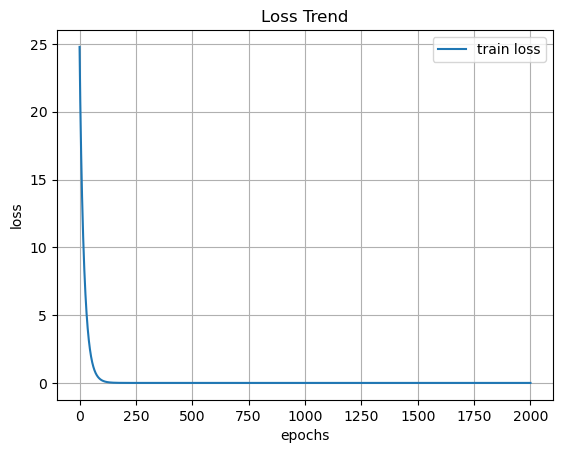

In [34]:
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(loss_list, label='train loss')
plt.legend(loc='best')

plt.show()